In [23]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from paths import RAW_DIR, STAGE_DIR

### Import the data

In [11]:
tnm1 = pd.read_csv(RAW_DIR / "breast_cancer_data_tnm.csv")
tnm2 = pd.read_csv(RAW_DIR / "breast_cancer_data_tnm_2.csv")

In [12]:
# concatenate the two datasets
data_tnm = pd.concat([tnm1, tnm2])
data_tnm

,ehr,n_tumor,t,n,m,t_after_neoadj,n_after_neoadj,m_after_neoadj
0,6849,1,1,0.0,0.0,NaN,NaN,NaN
1,6849,3,2,0.0,0.0,NaN,NaN,NaN
2,268,1,1,0.0,0.0,NaN,NaN,NaN
3,268,2,1,1.0,0.0,NaN,NaN,NaN
4,268,3,2,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
24,6647,1,NaN,NaN,NaN,2.0,2.0,0.0
25,768,1,X,X,1.0,NaN,NaN,NaN
26,4534,1,2,0,0.0,NaN,NaN,NaN
27,7062,1,1,0,0.0,NaN,NaN,NaN


In [13]:
cat = (data_tnm.dtypes == object)
cat_cols = data_tnm.columns[cat].tolist()

for column in cat_cols:
  print(column, data_tnm[column].unique())

t ['1' '2' '0' 'IS' nan '3' '4' 'X']
n [0.0 1.0 2.0 3.0 nan '1' '2' '0' '3' 'X']
t_after_neoadj [nan '1' '0' '3' '2' 'IS' 1.0 2.0 0.0]


### NULL values

In [14]:
print(data_tnm.isnull().sum())
data_tnm.info()

ehr                 0
n_tumor             0
t                   4
n                   6
m                   4
t_after_neoadj    204
n_after_neoadj    204
m_after_neoadj    204
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 236 entries, 0 to 28
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ehr             236 non-null    int64  
 1   n_tumor         236 non-null    int64  
 2   t               232 non-null    object 
 3   n               230 non-null    object 
 4   m               232 non-null    float64
 5   t_after_neoadj  32 non-null     object 
 6   n_after_neoadj  32 non-null     float64
 7   m_after_neoadj  32 non-null     float64
dtypes: float64(3), int64(2), object(3)
memory usage: 16.6+ KB


In [15]:
data_tnm['t'] = 'T' + (data_tnm['t']
    .fillna(9)
    .astype(str)
    .replace('\.0', '', regex=True))
data_tnm['n'] = 'N' + (data_tnm['n']
    .fillna(9)
    .astype(str)
    .replace('\.0', '', regex=True))
data_tnm['m'] = 'M' + (data_tnm['m']
    .fillna(9)
    .astype(str)
    .replace('\.0', '', regex=True))

data_tnm['t_after_neoadj'] = 'T' + (data_tnm['t_after_neoadj']
    .fillna(9)
    .astype(str)
    .replace('\.0', '', regex=True))
data_tnm['n_after_neoadj'] = 'N' + (data_tnm['n_after_neoadj']
    .fillna(9)
    .astype(str)
    .replace('\.0', '', regex=True))
data_tnm['m_after_neoadj'] = 'M' + (data_tnm['m_after_neoadj']
    .fillna(9)
    .astype(str)
    .replace('\.0', '', regex=True))

In [16]:
# Users can be duplicated for diff tumor types
data_tnm[data_tnm.ehr.duplicated(keep=False)]

,ehr,n_tumor,t,n,m,t_after_neoadj,n_after_neoadj,m_after_neoadj
0,6849,1,T1,N0,M0,T9,N9,M9
1,6849,3,T2,N0,M0,T9,N9,M9
2,268,1,T1,N0,M0,T9,N9,M9
3,268,2,T1,N1,M0,T9,N9,M9
4,268,3,T2,N0,M0,T9,N9,M9


In [17]:
data_tnm.loc[data_tnm.t.eq("TIS"), ['t', 't_after_neoadj']].value_counts(dropna=False)

t    t_after_neoadj
TIS  T9                16
dtype: int64

In [18]:
len(data_tnm['ehr'].unique())

233

In [19]:
data_tnm['t'].value_counts()

T1     106
T2      54
T0      37
TIS     16
T3      11
T4       7
T9       4
TX       1
Name: t, dtype: int64

In [20]:
data_tnm['t_after_neoadj'].value_counts()

T9     204
T1      17
T2       7
T0       6
T3       1
TIS      1
Name: t_after_neoadj, dtype: int64

In [21]:
# Take only data from patients with info before and after treatment
t_before_after = data_tnm.loc[(data_tnm.t != "TX") & (data_tnm.t_after_neoadj != "TX"), ['t', 't_after_neoadj']]
n_before_after = data_tnm.loc[(data_tnm.n != "NX") & (data_tnm.n_after_neoadj != "NX"), ['n', 'n_after_neoadj']]
m_before_after = data_tnm.loc[(data_tnm.m != "MX") & (data_tnm.m_after_neoadj != "MX"), ['m', 'm_after_neoadj']]
print(
  'T', len(t_before_after),
  'N',len(n_before_after),
  'M',len(m_before_after)
  )

T 235 N 235 M 236


Text(0.5, 1.0, 'M')

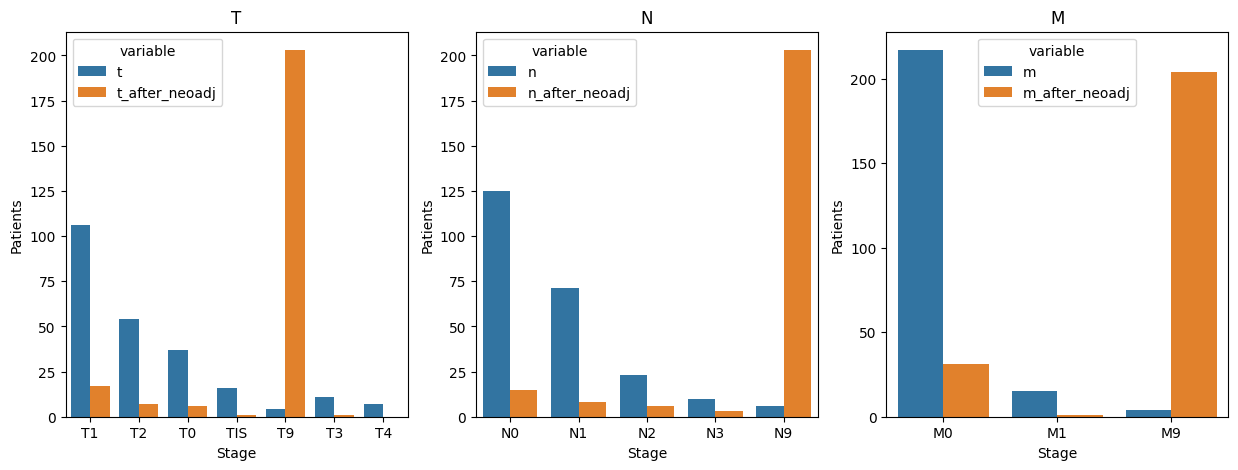

In [24]:
# Show the effect of neoadjuvance
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.countplot(ax=axes[0], data=pd.melt(t_before_after), x='value', hue='variable')
axes[0].set(xlabel='Stage')
axes[0].set(ylabel='Patients')
axes[0].set_title('T')

sns.countplot(ax=axes[1], data=pd.melt(n_before_after), x='value', hue='variable')
axes[1].set(xlabel='Stage')
axes[1].set(ylabel='Patients')
axes[1].set_title('N')

sns.countplot(ax=axes[2], data=pd.melt(m_before_after), x='value', hue='variable')
axes[2].set(xlabel='Stage')
axes[2].set(ylabel='Patients')
axes[2].set_title('M')

In [9]:
data_tnm.to_parquet(STAGE_DIR / 'tnm-preprocessed-v1.parquet')